# Computational Guided Inquiry for Polar Research

## Processing Sea Ice Images - 2. Image representation and Manipulation

### Learning Objectives
1. Learn about colormaps and apply them to an image.
1. Learn how images are stored and represented in Python.
2. Learn how to load, resize (crop), and save an image.
3. Learn how to convert a color image to a black and white image.
4. Learn how to extract the red, green, and blue components from an image.

### Pre-class activities
1. Read the Introduction below.
2. Describe two ways of representing images.


## Introduction



_Computer science connection_  
In this module we learn about image representation, including black and white images, color images, and color maps. Following that, we will learn basic image representation.

<b><u>Black-and-white Images</u></b>  
An image can be represented by individual dots. The dots are called picture elements (_pixels_). In Python, an image is represented as a matrix. Each element in the matrix corresponds to a pixel in the image. Each pixel of a black-and-white image stores the appropriate amount of "grayness."

The image below is a 681-by-1024 array of pixels. In Python, it is represented by a matrix of size $681 \times 1024$, where the matrix element $[i, j]$ shows the grayness of the pixel $[i, j]$. Notice that there is a difference between the regular coordinate system and the \mymatlab~matrix representation. In the Python~representation, the rows and columns start from index $[0, 0]$ using top-down and left-right directions. The level of grayness is represented by integers from 0 to 255, with 0 corresponding to black and 255 corresponding to white. 

Python has a data type \verb#uint8# to store pixel values. The uint8 is a 1-byte, unsigned integer format which is more economical than the 8-byte double format which supports floating-point arithmetic. 

<p style ='text-align: center;'>
<img src="Willamette_BW.jpg"/> 
Figure 1. A Black-and-White Picture is a Matrix in Python.
</p>  


<b><u>Color Images</u></b>  
There are two different methods to represent color images in Python: _truecolor_ and _colormap indexed_. The truecolor images are generated by digital cameras and are widely used in computer graphics. The indexed images are often used to display scientific and engineering data with an associated color scale representing the data units. 

In a truecolor image, a particular pixel stores the RGB color for that pixel. So instead of one entry for the "grayness" in the black-and-white image, three entries are needed to store the "redness", "greenness", and "blueness". In a sense, a color image a three-dimensional array of size M-by-N-by-3, or three matrices of the same size M-by-N, representing its RGB colors, as shown in Figure 2. 

<p style ='text-align: center;'>
<img src="Willamette_colors.png" height="380" width="520"/> 
Figure 1. A Truecolor Image is a 3-D Matrix in Python.
</p>  


The other method to represent the color is to index into a _colormap_: the index is an integer that maps to a row in a color map matrix. The color map itself stores the red, green, and blue components in three separate columns. 

<b><u>Image manipulations</u></b>  
The basic image manipulations in Python involve reading the image into Python, checking image size, choosing a smaller area to create a smaller image, and extracting the red, green and blue components of the original image.



In [2]:
# Following are the modules we will need.
import matplotlib
import matplotlib.pyplot as plt
from scipy import misc
from PIL import Image
import copy
import numpy as np
import imageio

## Part 1. Colormaps

The following example shows the current colormap (default name is viridis). We set the map to be a list giving the colors in the colormap viridis. Then we print the length of the list (how many colors there are in the colormap). Each item within the list is a color, represented by three numbers. Each set of numbers is contained within brackets. We can print the first three colors by indexing map.

In [3]:
# Viridis colormap
map = matplotlib.cm.viridis.colors
print(len(map))
print(map[:3])

256
[[0.267004, 0.004874, 0.329415], [0.26851, 0.009605, 0.335427], [0.269944, 0.014625, 0.341379]]


The following Python code loads another version of the Willamette image, this time as a matrix of colormap indices that correspond to a particular colormap. The code loads in the colormap, and the image is displayed using the indices to this colormap. Change "map" to different colormaps to see the effect of other colormaps.  

In [4]:
%matplotlib notebook

# Load matrix of indices for Willamette colormap image
X = np.loadtxt('WillametteMapInd')
mmap = np.loadtxt('WillametteMap')
thismap = list(zip(mmap[:,0],mmap[:,1],mmap[:,2]))
TCmap = matplotlib.colors.ListedColormap(thismap)

<IPython.core.display.Javascript object>


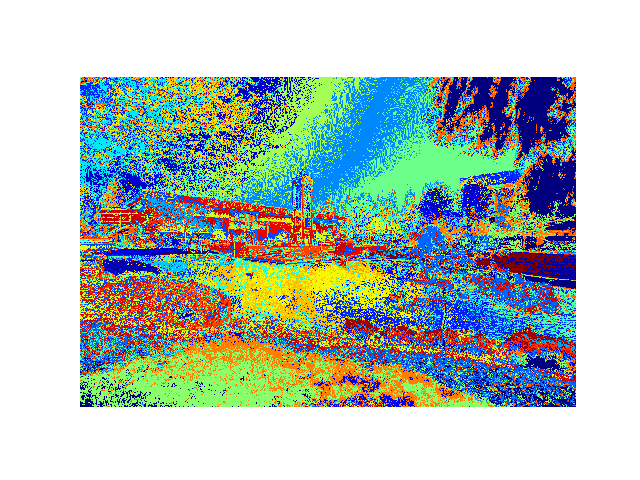

(-0.5, 1023.5, 680.5, -0.5)

In [5]:
# Plot the figure for the custom colormap
plt.figure()
plt.imshow(X, cmap = plt.get_cmap(TCmap))
plt.axis('off')    # Remove axis ticks and labels
plt.axis('image')  # Set aspect ratio to obtain square pixels (mb, check matplotlib document)

### Test your skill
Try changing the colormap. Run the cell below and watch how it changes the figure above. Replace "jet" with one of the other maps (e.g. viridis, hot, cool, bone, copper, pink, jet, prism, flag) and re-run the cell to see the effect.

In [6]:
plt.imshow(X, cmap = plt.get_cmap('jet'))   # Colormaps include: viridis, hot, cool, bone
                                         # copper, pink, jet, prism, flag, etc.

When the indices are mapped to the specific map created for the image, the image is similar to the truecolor image, but consists of fewer colors. Run the code below and compare the upper left and upper right panels

<IPython.core.display.Javascript object>


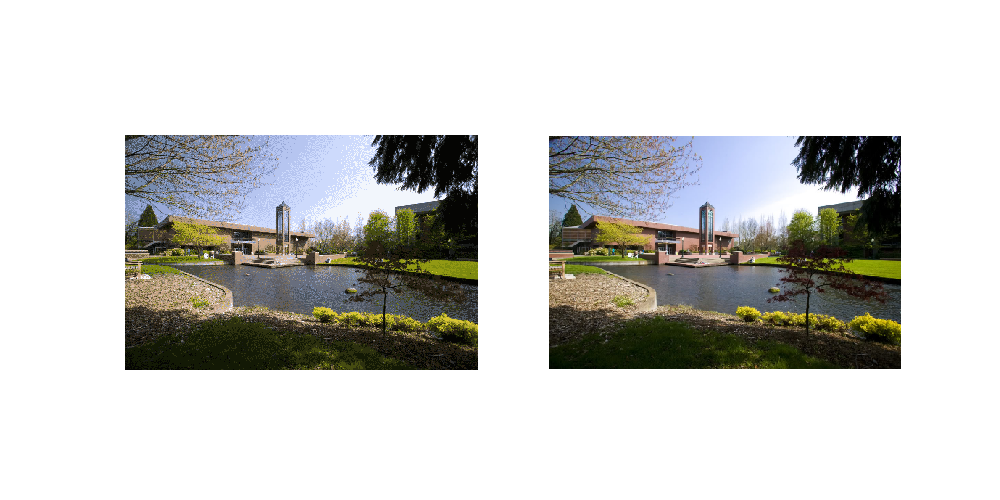

(-0.5, 486.5, 323.5, -0.5)

In [7]:
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.imshow(X, cmap = plt.get_cmap(TCmap))
plt.axis('off')    # Remove axis ticks and labels
plt.axis('image')  # Set aspect ratio to obtain square pixels 

willamette_color_image = imageio.imread('Willamette_colors2.png')
plt.subplot(122)
plt.imshow(willamette_color_image)
plt.axis('off')    # Remove axis ticks and labels
plt.axis('image')  # Set aspect ratio to obtain square pixels 


### Pause for analysis
One of these figures is for the colormap, which has dimensions of N x 3, where N is the number of unique colors. The other is the truecolor image, whichis represented by a 3-D matrix with dimensions 681 x 1024 x 3. 

1. Which figure do you think is the truecolor image?
2. About how many colors do you think the colormap has?
3. With your neighbor, discuss and list what might be a few pros and cons of each method of storing an image.
4. Which way do you think might be used with satellite images of Arctic ice?


<IPython.core.display.Javascript object>


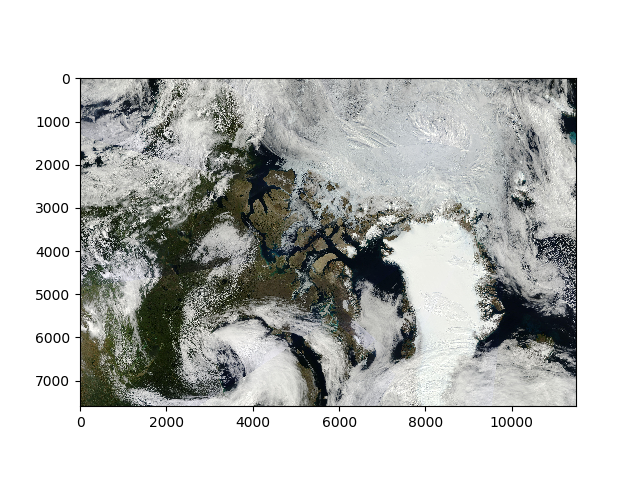

In [8]:
# Read in the image and save it to a variable. 
arctic = imageio.imread('august9_arctic_worldview_500mres.jpg')

# Show the image
plt.figure()
plt.imshow(arctic)

In [9]:
# Check the size of the image. Here we examine including the dimensions (shape) and the type of the data.
print (arctic.shape, arctic.dtype)

(7600, 11488, 3) uint8


<IPython.core.display.Javascript object>


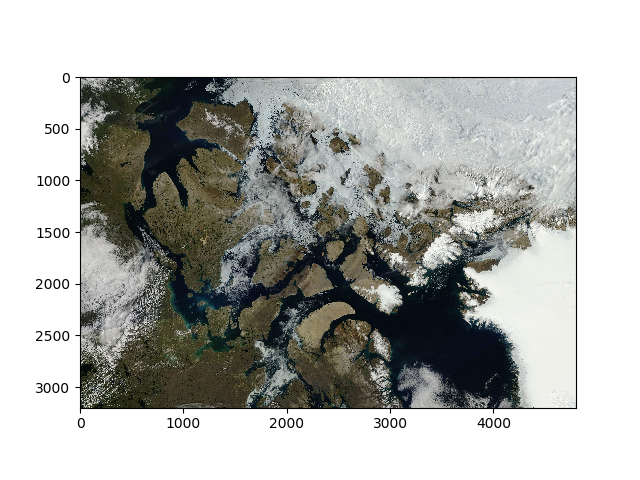

In [10]:
# Crop the image. We will focus on the region showing the NorthWest Passage.
arctic_crop = arctic[1900:5100, 3300:8100]
plt.figure()
plt.imshow(arctic_crop)

In [11]:
# Print the dimensions of arctic_crop, and the zeroth set of numbers in the 3rd dimension. 
print(arctic_crop.shape)
print(arctic_crop[0,0,:])

(3200, 4800, 3)
[167 167 165]


### Try your skill 1: Extract and plot color components.

In the cells below, the red component is extracted and plotted. Note in the cell above that arctic_crop is 3-dimensional. Furthermore, the 3rd dimension has 3 possibilities. For the zeroth index, these are printed out above. These correspond to red, green and blue color components. Below we separate out the red component. First we make a copy of the variable, arctic_crop, and call it "red". We use what is called a "deepcopy." Next, we set the values to zero for the third dimension for indices 1 and 2. Now only values for the zeroth index are non-zero. These correspond to red. Plotting the matrix shows that only red color exists.

Use the cell below to extract and plot the green and blue components in the cell that follows it.

<IPython.core.display.Javascript object>


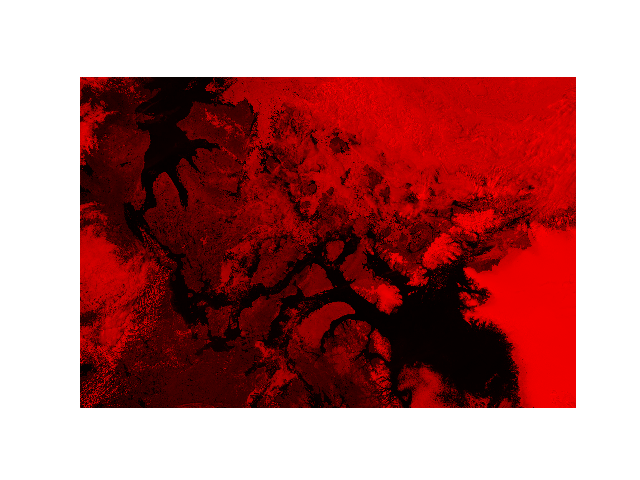

(-0.5, 4799.5, 3199.5, -0.5)

In [25]:
# 2.1.5. Extract the red components and plot it.
red = copy.deepcopy(arctic_crop)     # "deepcopy" the matrix
red[:,:,1] = 0   # set all values to zero for index 1 of the 3rd dimension
red[:,:,2] = 0   # set all values to zero for index 2 of the 3rd dimension

# Plot the red components
plt.figure()
plt.imshow(red)
plt.axis('off')

In [12]:
# Repeat the above for the blue components. 
# Use trial and error if you aren't sure which indices to set to zero.


In [13]:
# Repeat the above for the green components. 
# Use trial and error if you aren't sure which indices to set to zero.



In [14]:
# (Advanced) Finish the code below to create a 2x2 set of subplots of the original image 
#  and the red, green and blue components.
plt.figure()
plt.subplot(221)
plt.imshow(arctic_crop); plt.axis('off')

plt.subplot(22
plt.imshow(red); plt.axis('off')

plt.subplot(

plt.subplot(224)


SyntaxError: invalid syntax (<ipython-input-14-7e184581af69>, line 7)

In the cell below, we attempt to plot a grayscale version. However, the colormap 'gray' doesn't actually produce a gray plot! First we have to scale the red, green, and blue by the factors 0.299, 0.587, and 0.114. This is done in the following cell.

<IPython.core.display.Javascript object>


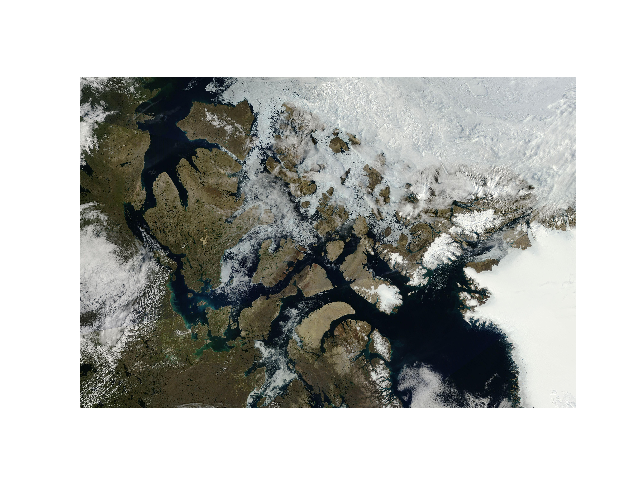

(-0.5, 4799.5, 3199.5, -0.5)

In [36]:
# Try to use the gray colormap to make a grayscale plot.
plt.figure()
plt.imshow(arctic_crop, cmap = 'gray'); plt.axis('off')

<IPython.core.display.Javascript object>


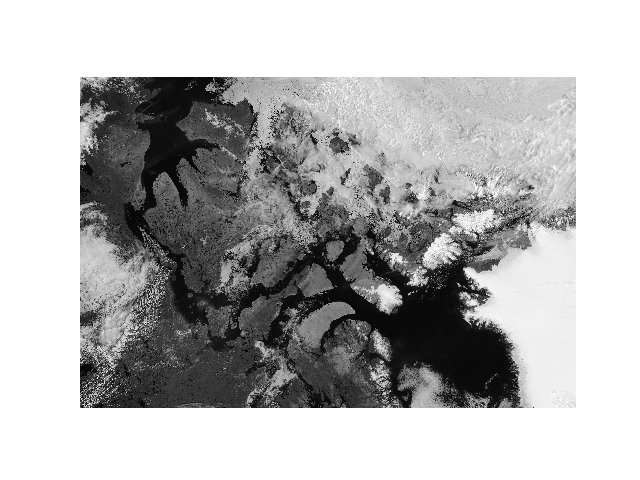

(-0.5, 4799.5, 3199.5, -0.5)

In [39]:
# First scale the red, green, and blue components, and then plot it with grayscale.
gray = 0.299 * arctic_crop[:,:,0] + 0.587 * arctic_crop[:,:,1] + 0.114 * arctic_crop[:,:,2]

plt.figure()
plt.imshow(gray, cmap = 'gray'); plt.axis('off')

### Pause for analysis
If you plot "gray" below with another colormap, do you think it will come out black and white, or with colors? Try it in the cell below. Print out some elements of the matrix "gray" and discuss the results with your neighbor. 

<IPython.core.display.Javascript object>


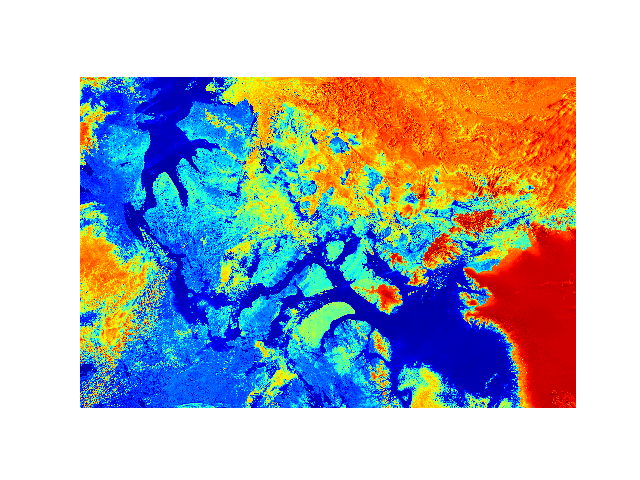

(-0.5, 4799.5, 3199.5, -0.5)

In [43]:
plt.figure()
plt.imshow(gray, cmap = 'jet'); plt.axis('off')

In the next module we will apply some image processing techniques to images of Arctic ice.